In [1]:

file_path= r"C:\Users\Lenovo\Investment Predictions-ML\stock\artifact\data_ingestion\2022-07-21-16-05-43\raw_data\SBIN"
preprocessed_object_file_name = r"C:\Users\Lenovo\Investment Predictions-ML\stock\artifact\data_transformation\2022-07-21-16-20-54\preprocessed\preprocessed.pkl"
test_arr = r"C:\Users\Lenovo\Investment Predictions-ML\stock\artifact\data_transformation\2022-07-21-16-20-54\transformed_data\test\SBIN"
train_arr = r"C:\Users\Lenovo\Investment Predictions-ML\stock\artifact\data_transformation\2022-07-21-16-20-54\transformed_data\train\SBIN" 

In [2]:
import os
os.getcwd()

'c:\\Users\\Lenovo\\Investment Predictions-ML\\notebook'

In [32]:
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv(file_path)

# looking at the first five rows of the data
# print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of the data:
(1370, 15)

 Shape of training set:
(987, 2)

 Shape of validation set:
(383, 2)

 RMSE value on validation set:
212.55991626926146


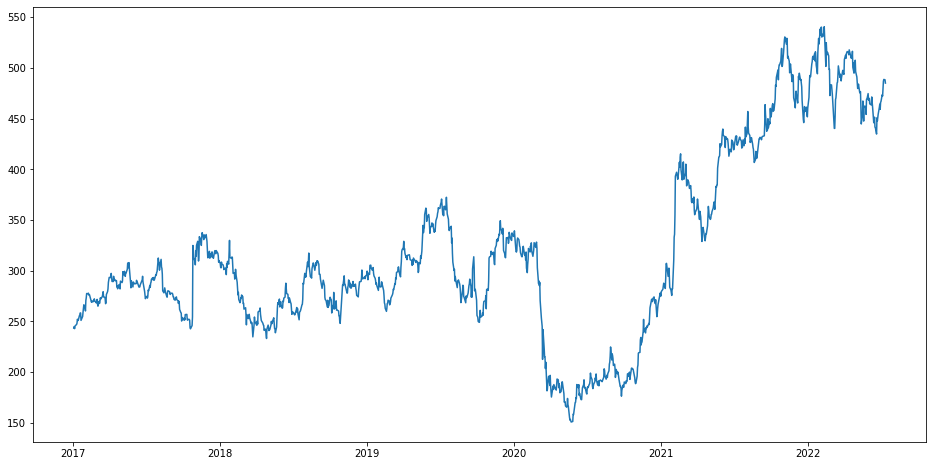

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

c:\Users\Lenovo\anaconda3\envs\stockenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Lenovo\anaconda3\envs\stockenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


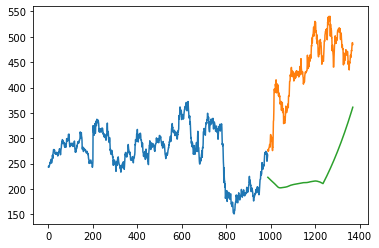

In [61]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [18]:
a = train['Close'][len(train)-248]
print(a)

334.45


In [27]:
preds= []
a= train['Close'][987-248:].sum() +sum(preds)
b=a/248
b
print(b, preds.append(b))



223.03931451612894 None


In [28]:
a= train['Close'][987-248+1:].sum() +sum(preds)
b=a/248
b
print(b, preds.append(b))


222.59007788111336 None


In [29]:
a= train['Close'][987-248+2:].sum() + sum(preds)
b=a/248
b
print(b, preds.append(b))

222.1194733564404 None


In [ ]:
a= train['Close'][987-248+1:].sum() +sum(preds)
b=a/248
b
print(b, preds.append(b))